# Machine Failure Prediction

`Author:` **Muhammad Usman**

`Email:` **usmanashraf4360@gmail.com**

In [111]:
# Import Liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [112]:
# Load data Set
train_df=pd.read_csv("playground-series-s3e17/train.csv")
test_df=pd.read_csv('playground-series-s3e17/test.csv')

In [113]:
#Print head of data
train_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [114]:
# check info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [115]:
# Check column names of both data sets
train_df.columns,test_df.columns

(Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
        'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
        'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
        'RNF'],
       dtype='object'),
 Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
        'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
        'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
       dtype='object'))

In [123]:
num_cols=['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']

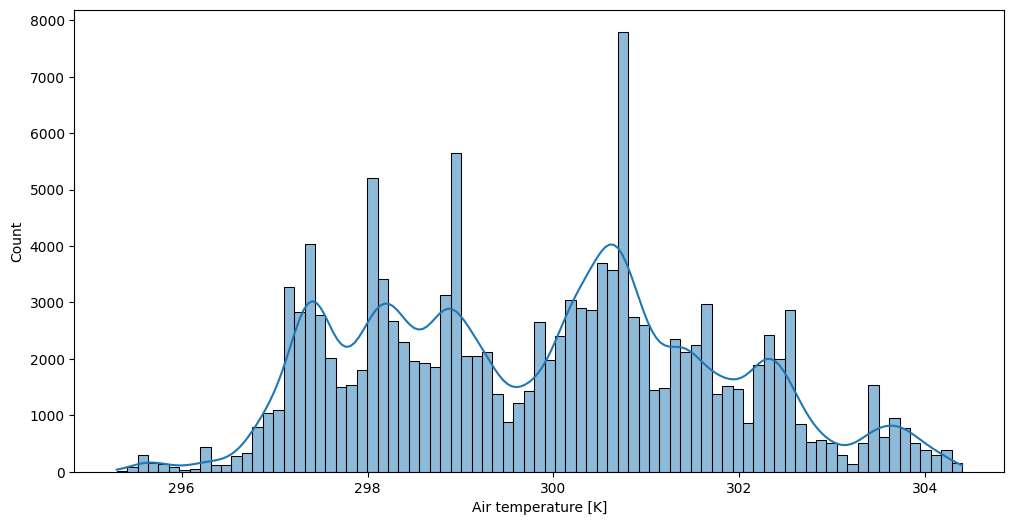

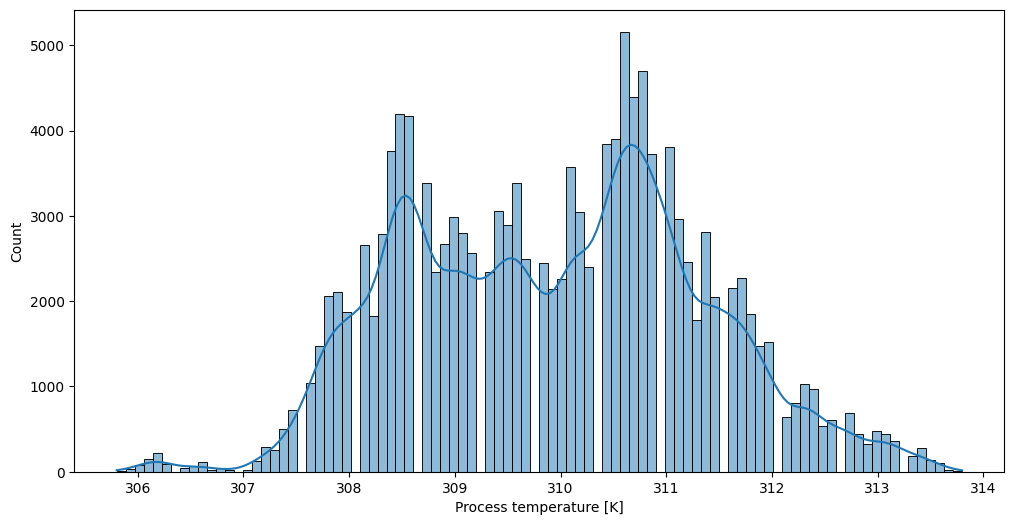

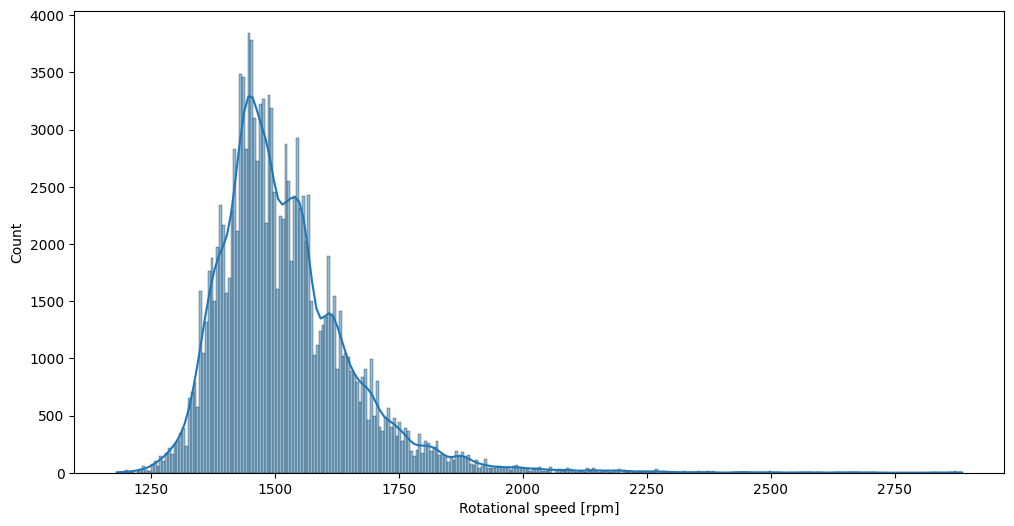

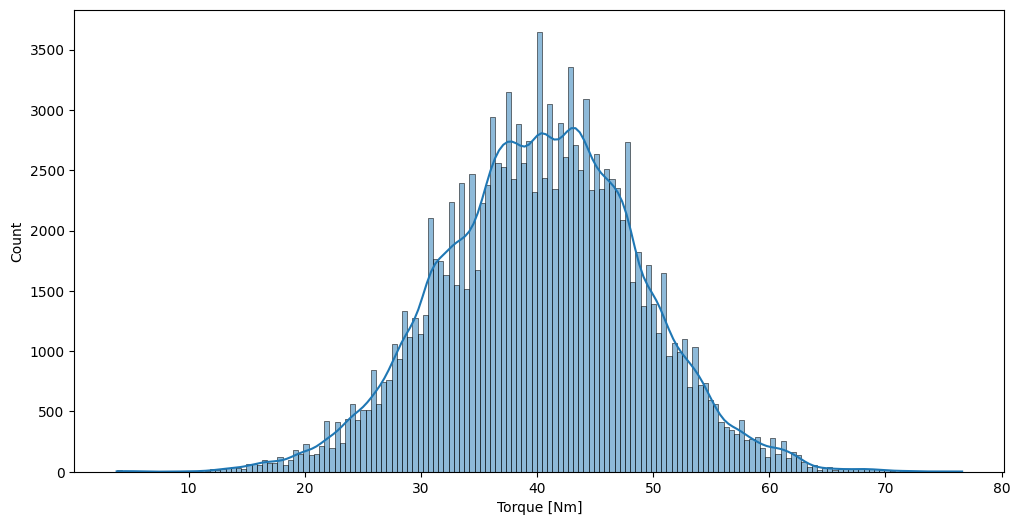

In [127]:
# Check data distribution by hist plot
for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.histplot(train_df,x=train_df[col],kde=True)

In [116]:
# Drop Product ID column
train_df.drop(['Product ID'],axis=1,inplace=True)

In [117]:
# Encode Type attribute by usning label encoder
le=LabelEncoder()
train_df['Type']=le.fit_transform(train_df['Type'])

In [118]:
# check info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Type                     136429 non-null  int32  
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int32(1), int64(9)
memory usage: 13.0 MB


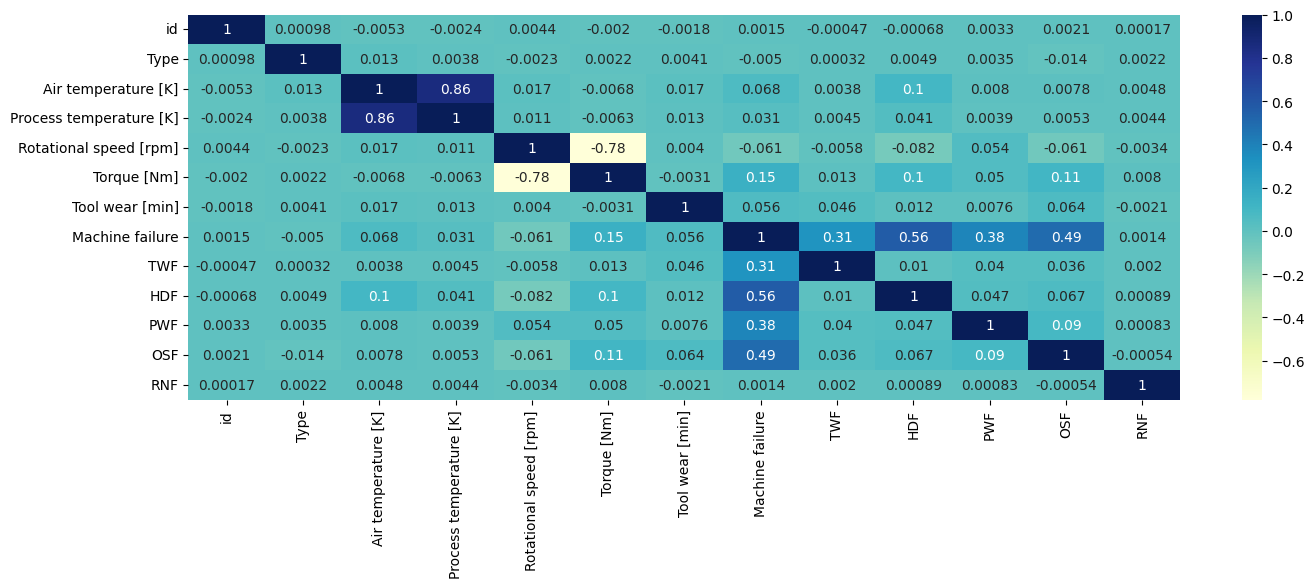

In [96]:
# Plot heatmap of numerical columns by using seaborn liberary
plt.figure(figsize=(16,5))
sns.heatmap(train_df.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [97]:
# define Target columns
trager_col=train_df['Machine failure']

<Axes: ylabel='Machine failure'>

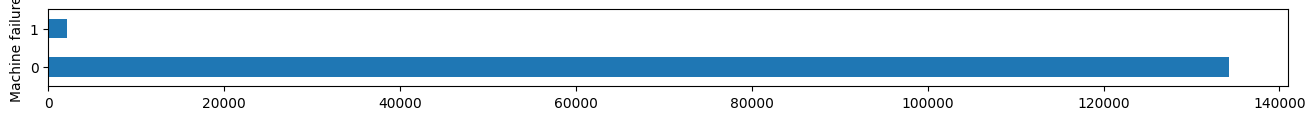

In [98]:
# check value counts of target column
trager_col.value_counts().plot(kind='barh',figsize=(16,1))

In [99]:
# Split data into X and y
X=train_df.drop(['Machine failure'],axis=1)
y=train_df['Machine failure']

In [100]:
# y attibute value counts
y.value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [101]:
# Deal with class imbalance data by using imblearn liberary
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=0.8)

In [102]:
X,y=sm.fit_resample(X,y)

In [103]:
# Check target varible value counts after dealing with class imbalance data
y.value_counts()

Machine failure
0    134281
1    107424
Name: count, dtype: int64

In [104]:
# Split data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [105]:
X_train

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
23869,23869,1,297.600000,308.700000,1528,39.000000,44,0,0,0,0,0
228683,2660,1,298.718091,310.373869,1364,49.280909,225,0,0,0,1,0
5010,5010,1,298.300000,308.900000,1408,44.200000,111,0,0,0,0,0
14146,14146,1,298.500000,307.900000,1546,37.500000,23,0,0,0,0,0
82004,82004,1,300.400000,311.800000,1429,14.900000,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,119879,1,298.000000,309.200000,1532,36.400000,158,0,0,0,0,0
103694,103694,2,301.100000,310.700000,1495,40.600000,74,0,0,0,0,0
131932,131932,0,300.800000,311.400000,1595,32.800000,41,0,0,0,0,0
146867,15179,0,298.739283,309.704014,1337,48.532541,199,0,0,0,0,0


In [106]:
# Scale the data by unsing standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [108]:
# Train the model
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [109]:
# Predict value from trained model
y_pred=rfc.predict(X_test)

In [110]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9291905421898595